In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [2]:
#%% Gerando os dados
x = np.linspace(0, 1, 1000)
a, b, c = 0, 10, -10
np.random.seed(2360873)
y = a + b * x + c * x ** 2 + np.random.normal(0, 0.1, len(x))
df = pd.DataFrame({'x': x, 'y': y})

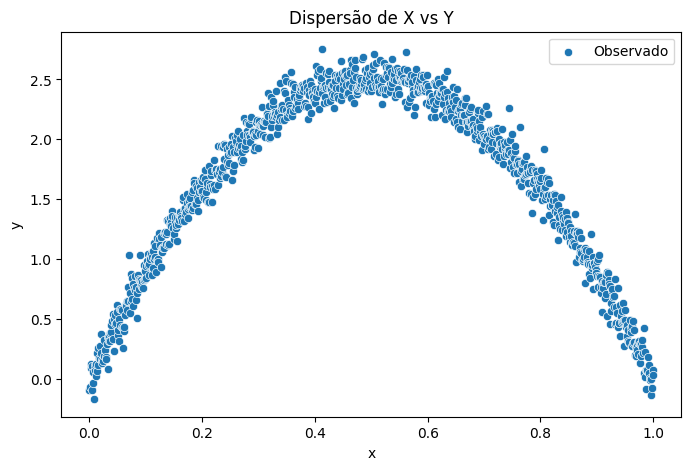

In [3]:
#%% Primeiro gráfico de X por Y
plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='y', data=df)
plt.title("Dispersão de X vs Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Observado"])
plt.show()

In [4]:
#%% Boosting: Construindo a primeira árvore
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(df[['x']], df['y'])
df['p'] = tree.predict(df[['x']])
df['r'] = df['y'] - df['p']

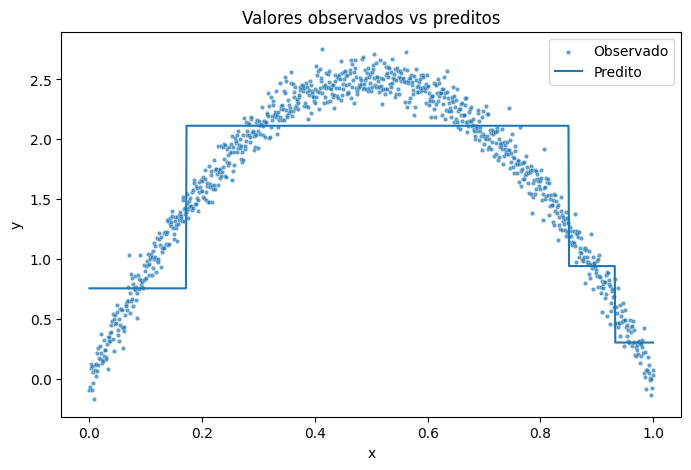

In [5]:
#%% Visualização gráfica dos valores esperados e observados
plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='y', data=df, alpha=0.7, label='Observado', s=10)
sns.lineplot(x='x', y='p', data=df, label='Predito')
plt.title("Valores observados vs preditos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

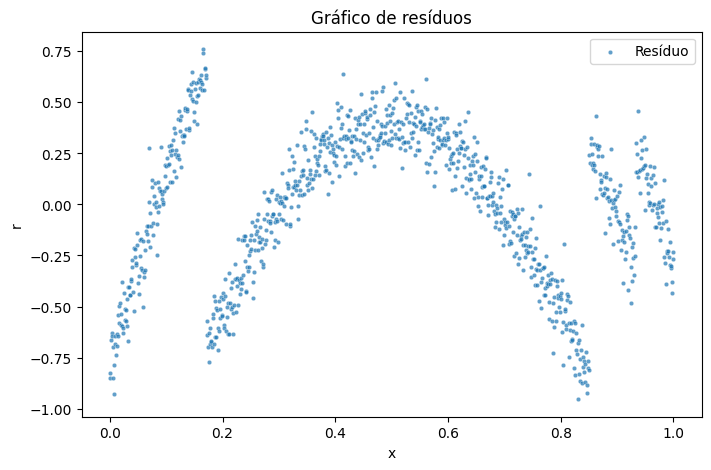

In [6]:
#%% Gráfico de resíduos
plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='r', data=df, alpha=0.7, label='Resíduo', s=10)
plt.title("Gráfico de resíduos")
plt.xlabel("x")
plt.ylabel("r")
plt.legend()
plt.show()


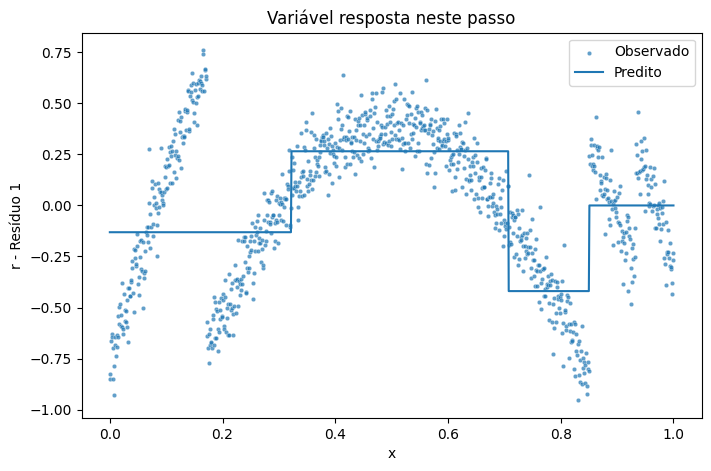

In [7]:
#%% Primeira iteração do boosting (uma árvore nos resíduos do anterior)
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(df[['x']], df['r'])
df['p1'] = tree1.predict(df[['x']])
df['P1'] = df['p'] + df['p1']
df['r1'] = df['r'] - df['p1']

#%%

plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='r', data=df, alpha=0.7, label='Observado', s=10)
sns.lineplot(x='x', y='p1', data=df, label='Predito')
plt.title("Variável resposta neste passo")
plt.xlabel("x")
plt.ylabel("r - Resíduo 1")
plt.legend()
plt.show()

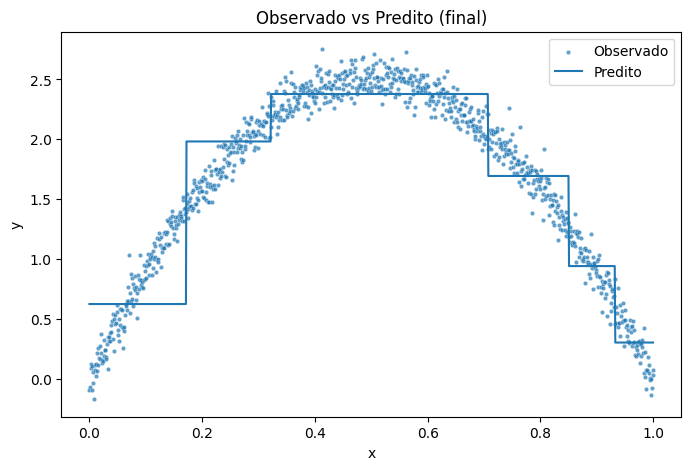

In [8]:
#%% Observado vs Esperado (final)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='y', data=df, alpha=0.7, label='Observado', s=10)
sns.lineplot(x='x', y='P1', data=df, label='Predito')
plt.title("Observado vs Predito (final)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


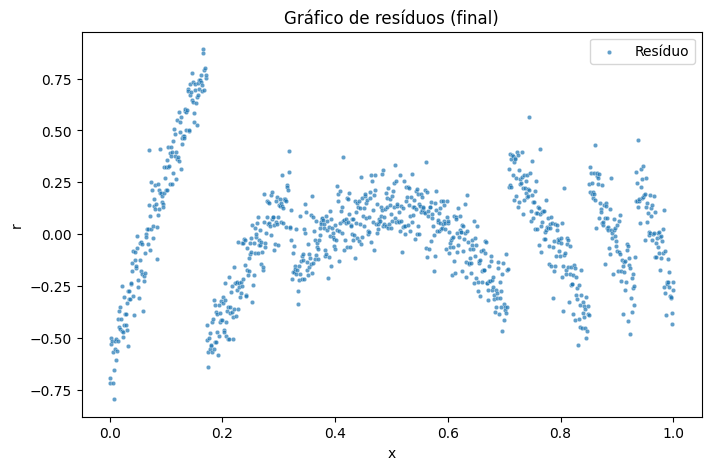

In [9]:
#%% Gráfico de resíduos (final)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='r1', data=df, alpha=0.7, label='Resíduo', s=10)
plt.title("Gráfico de resíduos (final)")
plt.xlabel("x")
plt.ylabel("r")
plt.legend()
plt.show()


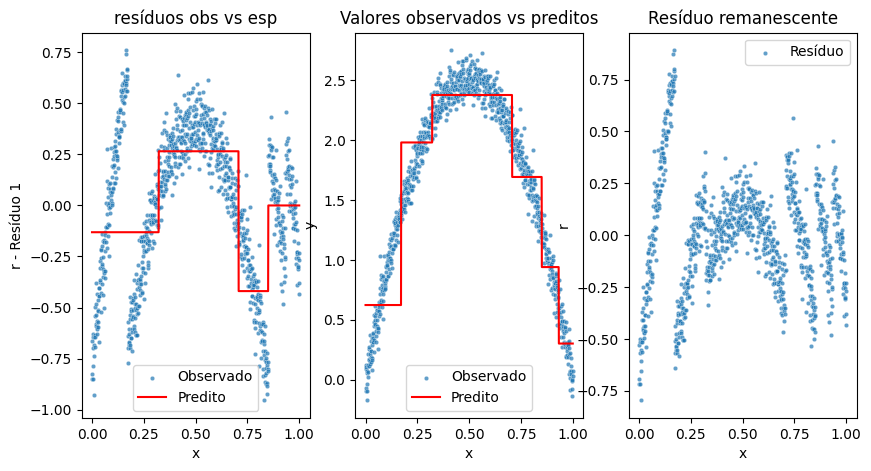

In [10]:
#%% Empacotando os gráficos em uma função
def graficos(df=df, y="y", x="x", r="r", p="p1", P='P1', ri='r1'):
    fig, ax = plt.subplots(1,3, figsize=(10, 5))
    
    # Mostrando somente a iteração atual: resíduos observados vs esperados
    sns.scatterplot(x=x, y=r, data=df, alpha=0.7, label='Observado', s=10, ax=ax[0])
    sns.lineplot(x=x, y=p, data=df, label='Predito', ax=ax[0], color="red")
    ax[0].set_title("resíduos obs vs esp")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("r - Resíduo 1")
    ax[0].legend()

    
    # Visualização gráfica dos valores esperados e observados (dados originais)
    sns.scatterplot(x=x, y=y, data=df, alpha=0.7, label='Observado', s=10, ax=ax[1])
    sns.lineplot(x=x, y=P, data=df, label='Predito', ax=ax[1], color="red")
    ax[1].set_title("Valores observados vs preditos")
    ax[1].set_xlabel(x)
    ax[1].set_ylabel(y)
    ax[1].legend()

    # Gráfico de resíduos
    sns.scatterplot(x=x, y=ri, data=df, alpha=0.7, label='Resíduo', s=10, ax=ax[2])
    ax[2].set_title("Resíduo remanescente")
    ax[2].set_xlabel(x)
    ax[2].set_ylabel(r)
    ax[2].legend()
    plt.show()

graficos(df=df, y="y", x="x", r="r", p="p1", P='P1')

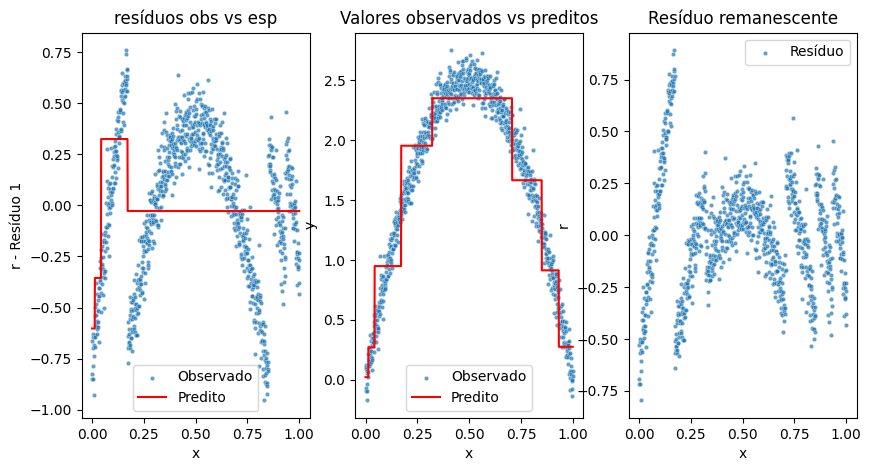

In [11]:
#%% Segunda iteração do boosting
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(df[['x']], df['r1'])
df['p2'] = tree2.predict(df[['x']])
df['P2'] = df['P1'] + df['p2']
df['r2'] = df['r1'] - df['p2']

#%%
graficos(df=df, y="y", x="x", r="r", p="p2", P='P2')

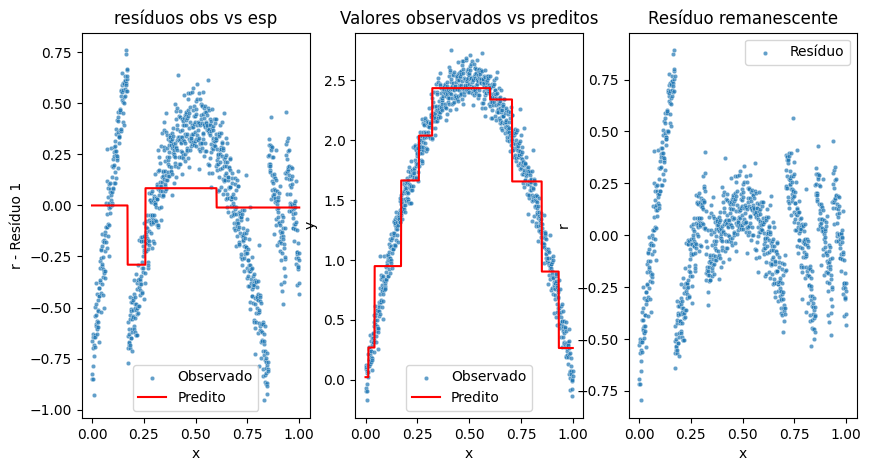

In [12]:
#%% Terceira iteração do boosting
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(df[['x']], df['r2'])
df['p3'] = tree2.predict(df[['x']])
df['P3'] = df['P2'] + df['p3']
df['r3'] = df['r2'] - df['p3']

#%%
graficos(df=df, y="y", x="x", r="r", p="p3", P='P3')